# Tayf Bilimine Giriş Proje Ödevi 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import scipy.constants as cons

Constats modulünde sabitler mks biriminde tanımlıdır. Bu yüzden bazı birim dönüşümleri yapacağız.
- Işık hızı: $c =2.99\times10^{10}\,\,cms^{-1}$ 
- Bolztman Sabiti: $k=1.38\times10^{-16}\,\, ergK^{-1}$
- Planck Sabiti: $h=6.62\times10^{-27}\,\,ergs$


In [2]:
h, c, k = cons.h*1e7, cons.c*1e2, cons.k*1e7

## Daga Boyu Aralığı 

In [3]:
lambda_a = np.arange(1000, 20001) #Angstrom
lambda_c = lambda_a*1e-8 #cm

$B_{\lambda}(\lambda,T)=\frac{2hc^2}{\lambda^5} (\frac{1}{e^{\frac{hc}{\lambda kT}}-1})$

In [4]:
def plancks_law(t): #Planck yasasını fonksiyon haline getiriyorum.
    j = (2*h*c**2/lambda_c**5)*(1/(np.exp((h*c)/(lambda_c*k*t))-1))
    return j

In [5]:
t1, t2, t3 = 4000, 5000, 8000
B1, B2, B3 = plancks_law(t1), plancks_law(t2), plancks_law(t3) # dalga boyu

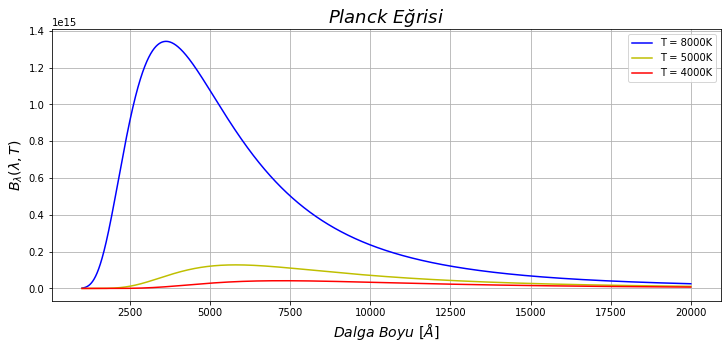

In [6]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title(r'$Planck\,\, Eğrisi$', fontsize= 18)
axs.plot(lambda_a, B3, 'b', label = 'T = 8000K')
axs.plot(lambda_a, B2, 'y', label = 'T = 5000K')
axs.plot(lambda_a, B1, 'r', label = 'T = 4000K')
axs.set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=14)
axs.set_xlabel('$Dalga\,\,Boyu\,\,[\AA]$', fontsize=14)
axs.grid(True)
axs.legend()
plt.savefig(fname='planck_egrsi.png', facecolor="white")
plt.show()

$B_{\nu}(\nu, T) = \frac{2h\nu^2}{c^2}\frac{1}{e^{\frac{h\nu}{kT}}-1}$

In [7]:
nu_a = c/lambda_a
nu_c = c/lambda_c

In [8]:
def plancks_law2(t):
    i = (2*h*nu_c**2/c**2)*(1/(np.exp((h*nu_c)/(k*t))-1))
    return i

In [9]:
b1 , b2, b3 = plancks_law2(t1), plancks_law2(t2), plancks_law2(t3)# frekans

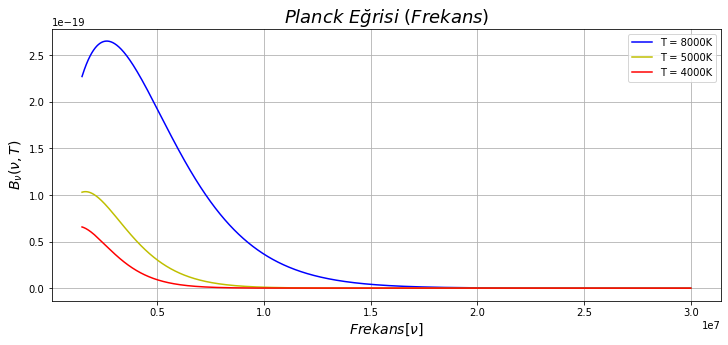

In [10]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title(r'$Planck\,\, Eğrisi\,\, (Frekans)$', fontsize= 18)
axs.plot(nu_a, b3, 'b', label = 'T = 8000K')
axs.plot(nu_a, b2, 'y', label = 'T = 5000K')
axs.plot(nu_a, b1, 'r', label = 'T = 4000K')
axs.set_ylabel('$B_{\u03BD}(\u03BD,T)$', fontsize=14)
axs.set_xlabel('$Frekans[\u03BD]$', fontsize=14)
axs.grid(True)
axs.legend()
plt.savefig(fname='planck_egrsi_frekans.png', facecolor="white")
plt.show()

- Normalize ediyorum.

In [11]:
nB1, nB2, nB3 = B1/max(B1), B2/max(B2), B3/max(B3)

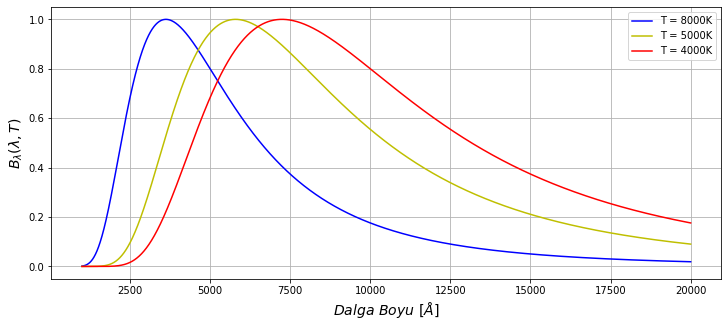

In [12]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('')
axs.plot(lambda_a, nB3, 'b', label = 'T = 8000K')
axs.plot(lambda_a, nB2, 'y', label = 'T = 5000K')
axs.plot(lambda_a, nB1, 'r', label = 'T = 4000K')
axs.set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=14)
axs.set_xlabel('$Dalga\,\,Boyu\,\,[\AA]$', fontsize=14)
axs.grid(True)
axs.legend()
plt.savefig(fname='normalize_planck_egrsi.png', facecolor="white")
plt.show()

## Grafilerin Altında Kalan Alan

In [13]:
A1, A2, A3 = np.sum(B1[1:-1:2]),  np.sum(B2[1:-1:2]), np.sum(B3[1:-1:2])
print('''-T=4000K için Alan={} cm^2\n-T=5000K için Alan={} cm^2\n-T=8000K için Alan={} cm^2'''.format(A1,A2,A3))

-T=4000K için Alan=1.9782117180269635e+17 cm^2
-T=5000K için Alan=5.156234501086277e+17 cm^2
-T=8000K için Alan=3.59947902830927e+18 cm^2


In [16]:
# Grafiklerin altında kalan alanı işaretlemek için :)
verts1 = [(lambda_a[0], 0), *zip(lambda_a, B1), (lambda_a[-1], 0)]
poly1 = Polygon(verts1, facecolor='0.7', edgecolor='0.5')

verts2 = [(lambda_a[0], 0), *zip(lambda_a, B2), (lambda_a[-1], 0)]
poly2 = Polygon(verts2, facecolor='0.7', edgecolor='0.5')

verts3 = [(lambda_a[0], 0), *zip(lambda_a, B3), (lambda_a[-1], 0)]
poly3 = Polygon(verts3, facecolor='0.7', edgecolor='0.5')

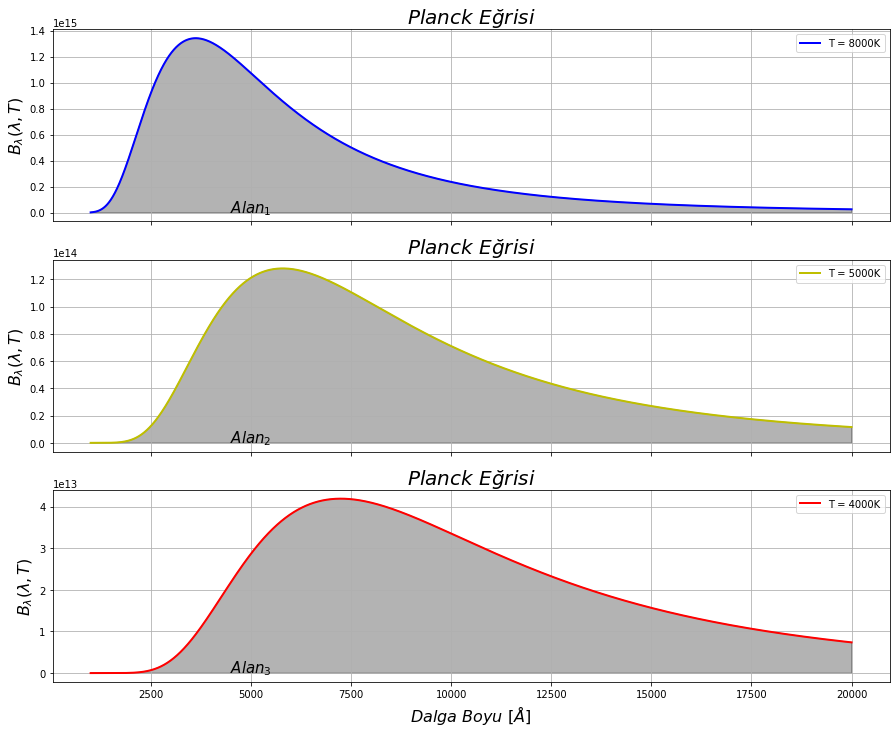

In [15]:
fig, axs = plt.subplots(nrows=3, figsize=(15,12))

axs[0].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[0].plot(lambda_a, B3, 'b', label = 'T = 8000K',  linewidth=2)
axs[0].add_patch(poly3)
axs[0].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[0].grid(True)
axs[0].text(5000, (0.25**15), r'$Alan_{1}$',
        horizontalalignment='center', fontsize=15)

axs[1].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[1].plot(lambda_a, B2, 'y', label = 'T = 5000K', linewidth=2)
axs[1].add_patch(poly2)
axs[1].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[1].grid(True)
axs[1].text(5000, (0.25**14), r'$Alan_{2}$',
        horizontalalignment='center', fontsize=15)

axs[2].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[2].plot(lambda_a, B1, 'r', label = 'T = 4000K', linewidth=2)
axs[2].add_patch(poly1)
axs[2].set_xlabel('$Dalga\,\,Boyu\,\,[\AA]$', fontsize=16)
axs[2].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[2].grid(True)
axs[2].text(5000, (0.25**13), r'$Alan_{3}$',
        horizontalalignment='center', fontsize=15)
for ax in axs.flat:
    ax.label_outer()
    ax.legend()
plt.savefig(fname='alan_planck_egrsi.png', facecolor="white")

In [17]:
#sigma 
def sigma(a,t):
    return 10**(np.log(a)/(4*np.log(t)))

In [18]:
sigma1, sigma2, sigma3 = sigma(A1, t1), sigma(A2, t2), sigma(A3, t3)
sigma1, sigma2, sigma3

(15.865111772631145, 15.743905801783203, 15.436926614717887)

In [19]:
alanlar = np.log(np.array([A1, A2, A3]))# Alanların logaritması
ts = np.log(np.array([4000, 5000, 8000])) # Sıcaklıkların logaritması

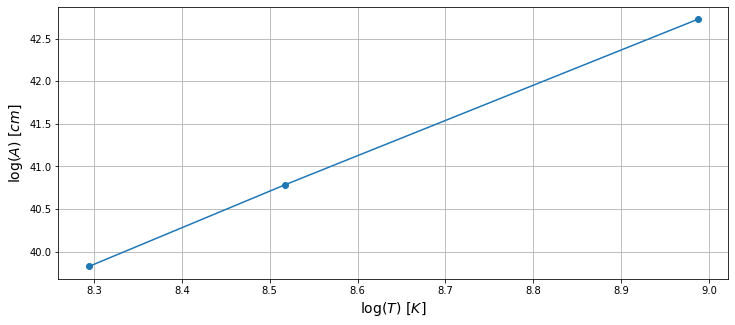

In [20]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('')
axs.scatter(ts, alanlar)
axs.plot(ts, alanlar)
axs.set_ylabel('$\log(A)\,\, [cm]$', fontsize=14)
axs.set_xlabel('$\log(T)\,\,[K]$', fontsize=14)
axs.grid(True)
#axs.legend()
plt.savefig(fname='log(a)_and_log(t).png', facecolor="white")
plt.show()

# Wiean Yasasının elde edilmesi

In [21]:
x1, y1 = np.array([lambda_a[np.argmax(B1)],lambda_a[np.argmax(B1)] ]), np.array([0,max(nB1) ])
x2, y2 = np.array([lambda_a[np.argmax(B2)],lambda_a[np.argmax(B2)] ]), np.array([0,max(nB2) ])
x3, y3 = np.array([lambda_a[np.argmax(B3)],lambda_a[np.argmax(B3)] ]), np.array([0,max(nB3) ])

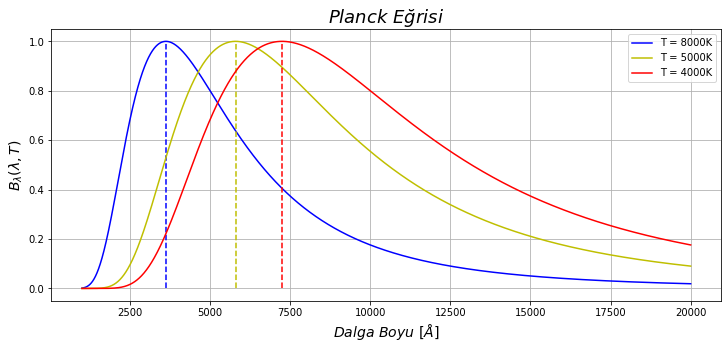

In [22]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title(r'$Planck\,\, Eğrisi$', fontsize= 18)
axs.plot(lambda_a, nB3, 'b', label = 'T = 8000K')
axs.plot(x3, y3, 'b--')
axs.plot(lambda_a, nB2, 'y', label = 'T = 5000K')
axs.plot(x2, y2, 'y--')
axs.plot(lambda_a, nB1, 'r', label = 'T = 4000K')
axs.plot(x1, y1, 'r--')
axs.set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=14)
axs.set_xlabel('$Dalga\,\,Boyu\,\,[\AA]$', fontsize=14)
axs.grid(True)
axs.legend()
plt.savefig(fname='wien_planck_egrsi.png', facecolor="white")
plt.show()

In [23]:
def wien(b,t):
    return lambda_a[np.argmax(b)]*t

In [24]:
W1, W2, W3 = wien(B1, t1), wien(B2,t2), wien(B3,t3)

In [25]:
maxs = np.array([max(B1), max(B2), max(B3)])# her bir sıcaklık için max değer
sıcaklık = np.array([4000, 5000, 8000])

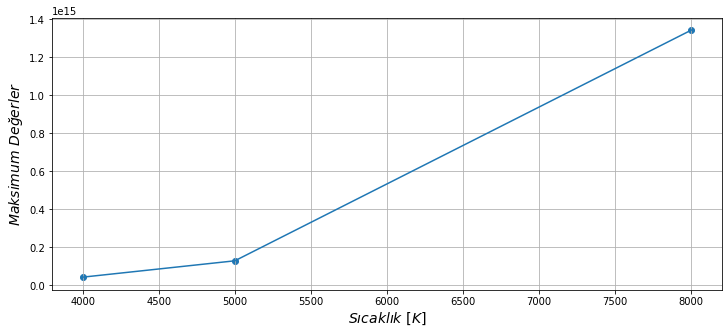

In [26]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('')
axs.scatter(sıcaklık, maxs)
axs.plot(sıcaklık, maxs)
axs.set_ylabel('$Maksimum\,\, Değerler$', fontsize=14)
axs.set_xlabel('$Sıcaklık\,\,[K]$', fontsize=14)
axs.grid(True)
#axs.legend()
plt.savefig(fname='normalize_planck_egrsi.png', facecolor="white")
plt.show()

In [27]:
m1 = (max(B2) - max(B1))/ (t2-t1)
m2 = (max(B3) - max(B2))/ (t3-t2)


# Rek parlaklıkları

In [28]:
index1, index2, index3 = np.argwhere(lambda_a==3600)[0][0], np.argwhere(lambda_a==4400)[0][0], np.argwhere(lambda_a==5500)[0][0]

In [29]:
U1, B_1, V1 = B1[index1], B1[index2], B1[index3]
U2, B_2, V2 = B2[index1], B2[index2], B2[index3]
U3, B_3, V3 = B3[index1], B3[index2], B3[index3]

In [30]:
x11, y11 = np.array([lambda_a[index1],lambda_a[index1] ]), np.array([0,U1 ])
x12, y12 = np.array([lambda_a[index2],lambda_a[index2] ]), np.array([0,B_1 ])
x13, y13 = np.array([lambda_a[index3],lambda_a[index3] ]), np.array([0,V1 ])

x21, y21 = np.array([lambda_a[index1],lambda_a[index1] ]), np.array([0,U2 ])
x22, y22 = np.array([lambda_a[index2],lambda_a[index2] ]), np.array([0,B_2 ])
x23, y23 = np.array([lambda_a[index3],lambda_a[index3] ]), np.array([0,V2 ])


x31, y31 = np.array([lambda_a[index1],lambda_a[index1] ]), np.array([0,U3 ])
x32, y32 = np.array([lambda_a[index2],lambda_a[index2] ]), np.array([0,B_3 ])
x33, y33 = np.array([lambda_a[index3],lambda_a[index3] ]), np.array([0,V3 ])

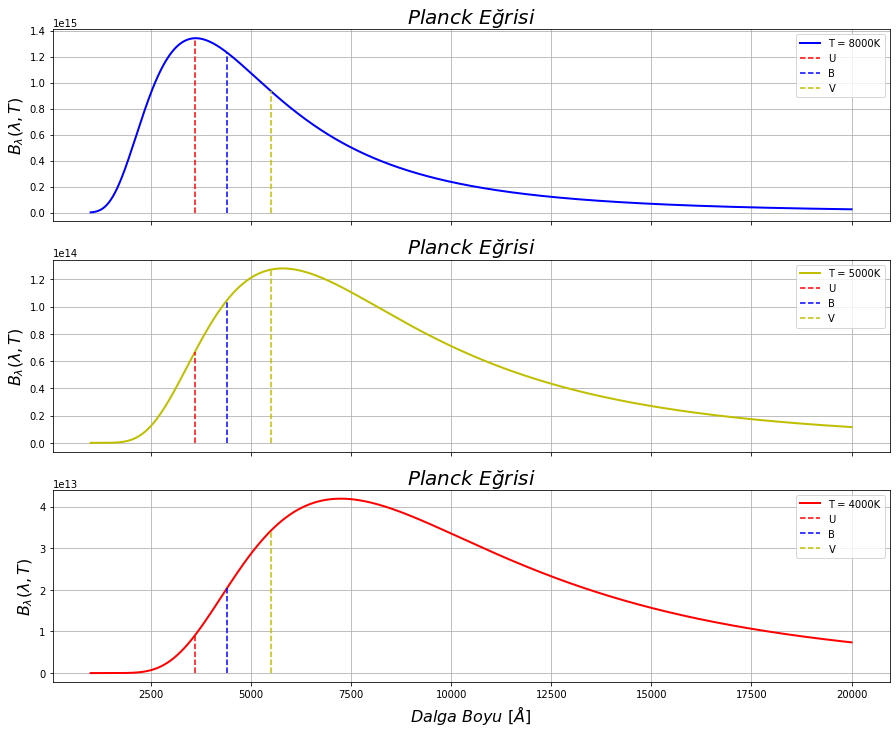

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(15,12))

axs[0].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[0].plot(lambda_a, B3, 'b', label = 'T = 8000K',  linewidth=2)
axs[0].plot(x31, y31, 'r--', label ='U')
axs[0].plot(x32, y32,'b--', label ='B')
axs[0].plot(x33, y33, 'y--', label = 'V')
axs[0].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[0].grid(True)


axs[1].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[1].plot(lambda_a, B2, 'y', label = 'T = 5000K', linewidth=2)
axs[1].plot(x21, y21, 'r--', label ='U')
axs[1].plot(x22, y22,'b--', label ='B')
axs[1].plot(x23, y23, 'y--', label = 'V')
axs[1].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[1].grid(True)


axs[2].set_title(r'$Planck\,\, Eğrisi$', fontsize= 20)
axs[2].plot(lambda_a, B1, 'r', label = 'T = 4000K', linewidth=2)
axs[2].plot(x11, y11, 'r--', label ='U')
axs[2].plot(x12, y12,'b--', label ='B')
axs[2].plot(x13, y13, 'y--', label = 'V')
axs[2].set_xlabel('$Dalga\,\,Boyu\,\,[\AA]$', fontsize=16)
axs[2].set_ylabel('$B_{\lambda}(\lambda,T)$', fontsize=16)
axs[2].grid(True)

for ax in axs.flat:
    ax.label_outer()
    ax.legend()
plt.savefig(fname='ubv_renk.png', facecolor="white")

In [32]:
def pogson(B,V):
    return 2.5*np.log10(V/B)

In [33]:
B1_color = pogson(B_1,V1)
B2_color = pogson(B_2,V2)
B3_color = pogson(B_3,V3)
B1_color, B2_color, B3_color

(0.5650388026344391, 0.21299228345835386, -0.30010396075047324)

In [34]:
B_3,V3

(1232719215570292.5, 935023619141799.0)